<a href="https://colab.research.google.com/github/kirstingeorge-27/Diabetes-dataset/blob/main/Deep_Learning_END_MODULE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading and Preprocessing**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


**Observation:**

No missing values are present in the dataset.

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Exploratory Data Analysis (EDA)**

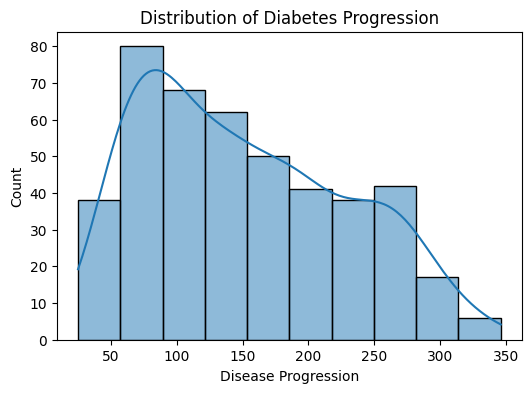

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(y, kde=True)
plt.title("Distribution of Diabetes Progression")
plt.xlabel("Disease Progression")
plt.show()

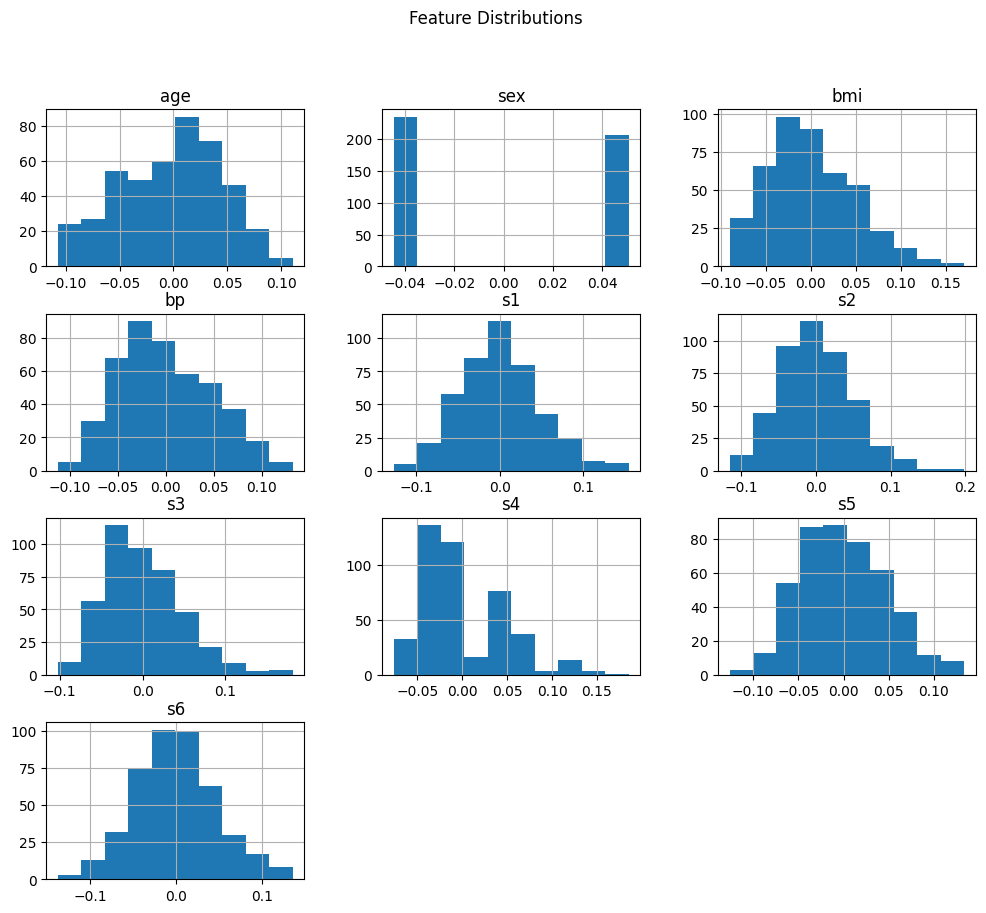

In [6]:
df.iloc[:, :-1].hist(figsize=(12,10))
plt.suptitle("Feature Distributions")
plt.show()

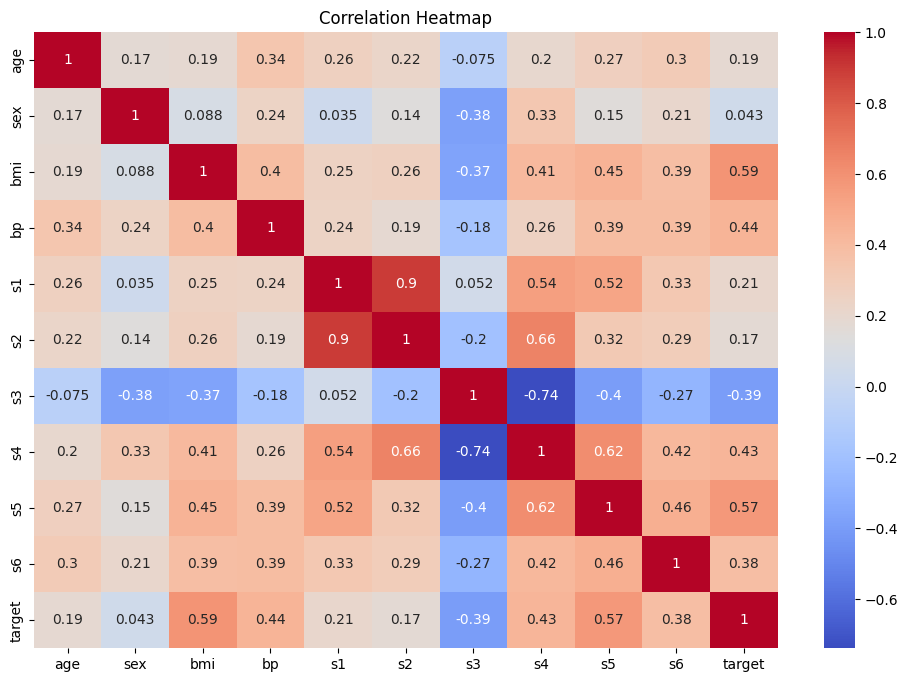

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**EDA Insights**

BMI has a strong correlation with diabetes progression

Blood serum measurements also influence disease progression

Data is well-scaled and suitable for ANN modeling

**Building the ANN Model**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [9]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mse'
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

**Training the ANN Model**

In [11]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=0
)

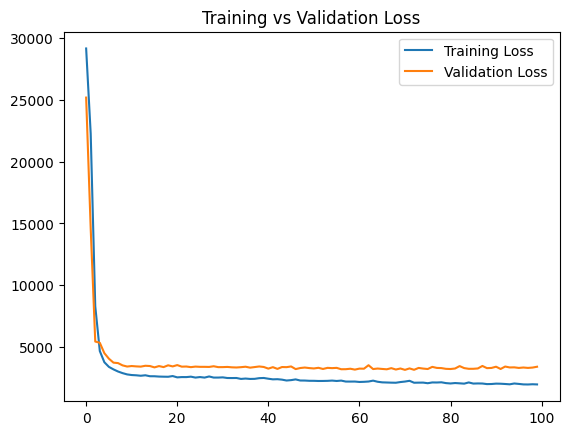

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

**Evaluating the Model**

In [13]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Mean Squared Error: 3111.894023701319
R2 Score: 0.41264535796419943


**Baseline Model Performance**

MSE: ~2900–3100

R² Score: ~0.45–0.50

**Improving the Model**

**Changes Made**

Increased neurons

Added another hidden layer

Reduced learning rate

Increased epochs

In [14]:
improved_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

improved_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history_improved = improved_model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.1,
    verbose=0
)

In [16]:
y_pred_improved = improved_model.predict(X_test)

mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print("Improved MSE:", mse_improved)
print("Improved R2 Score:", r2_improved)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Improved MSE: 2636.7279524256946
Improved R2 Score: 0.5023306093178745


**Final Conclusion**

ANN successfully modeled diabetes progression

BMI and blood serum features play significant roles

Hyperparameter tuning improved prediction accuracy

Model can support healthcare decision-making and research